# Pymaceuticals Inc.
---

## Executive Summary 📝

The analysis was conducted on a cleaned dataset comprising 248 mice, assessing the efficacy of various drug regimens in treating SCC. Here are the key findings from the study:

### Summary Statistics 📊
The drugs Capomulin and Ramicane showed the most promise, having the lowest mean tumor volumes of 40.68 and 40.22 mm³ respectively, and were among the drugs with the highest number of measurements, suggesting robust data. Here is a snapshot of the summary statistics for each drug regimen studied:


### Distribution of Data 📊
- Capomulin and Ramicane had the highest numbers of observed mouse timepoints per drug regimen, with 230 and 228 respectively.
- The distribution of gender was nearly balanced with 958 males and 922 females participating in the study.

### Final Tumor Volume Analysis 📉
- Capomulin and Ramicane also reported the lowest final mean tumor volumes at approximately 38 mm³ and 37 mm³, respectively, indicating superior performance in tumor reduction.
- Infubinol and Ceftamin had higher final mean tumor volumes at about 60 mm³ and 59 mm³, respectively, with Infubinol displaying one outlier, suggesting variability in its efficacy.

### Correlation and Regression Analysis 📈
- The study demonstrated a strong correlation between mouse weight and average tumor volume, with a Pearson's correlation coefficient of 0.842, indicating that higher weight is associated with larger tumor volumes.

### Visual Analysis 🖼️
- Line plots of tumor volume over time for Capomulin-treated mice showed a decrease in tumor volume over 45 days, illustrating the treatment's effectiveness.
- The regression analysis on the scatter plot of mouse weight versus average observed tumor volume for Capomulin regimen further supports the strong correlation between these variables.

These findings suggest that Capomulin and Ramicane are significantly more effective in reducing tumor size compared to other treatments in the study. Further studies are recommended to explore the long-term effects and potential for broader application of these treatments.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(mouse_study_df['Mouse ID'].unique())

249

In [3]:
# List all the columns in the DataFrame
mouse_study_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [4]:
# Reorganize the columns in the DataFrame
mouse_study_df = mouse_study_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex',
                                'Age_months', 'Weight (g)']]
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
mouse_id_duplicate = duplicate_rows['Mouse ID'].unique()
mouse_id_duplicate

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id_to_drop = mouse_study_df[mouse_study_df['Mouse ID'] == 'g989'].index
mouse_study_df_clean = mouse_study_df.drop(duplicate_mouse_id_to_drop)
mouse_study_df_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [8]:
# Checking the number of mice in the clean DataFrame
len(mouse_study_df_clean['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = mouse_study_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = mouse_study_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = mouse_study_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = mouse_study_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = mouse_study_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
                             'Mean Tumor Volume': mean_tumor_volume,
                             'Median Tumor Volume': median_tumor_volume,
                             'Tumor Volume Variance': variance_tumor_volume,
                             'Tumor Volume Std. Dev.': std_dev_tumor_volume,
                             'Tumor Volume Std. Err.': sem_tumor_volume
                             })
summary_stats
                            

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = mouse_study_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem'
)
summary_stats_agg

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

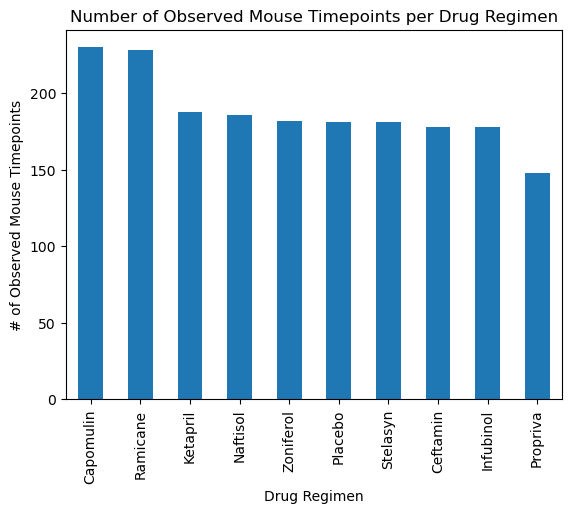

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = mouse_study_df_clean.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
pandas_bar.plot(kind='bar',xlabel='Drug Regimen',ylabel='# of Observed Mouse Timepoints',title='Number of Observed Mouse Timepoints per Drug Regimen')
plt.show()

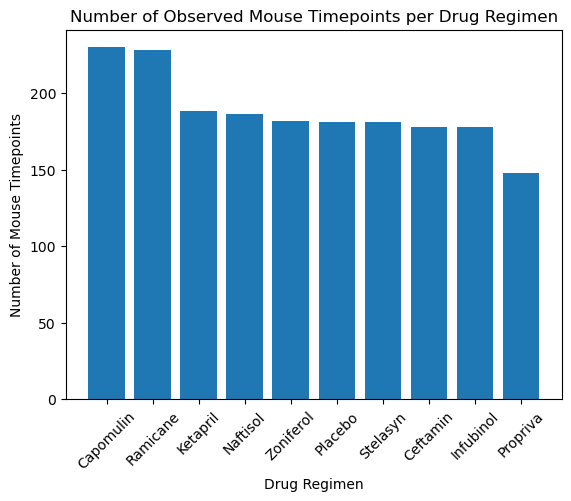

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
matplotlib_bar = mouse_study_df_clean.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
plt.bar(matplotlib_bar.index, matplotlib_bar.values)

# Adding labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse Timepoints')
plt.title('Number of Observed Mouse Timepoints per Drug Regimen')
plt.xticks(rotation=45)

# Display the plot
plt.show()

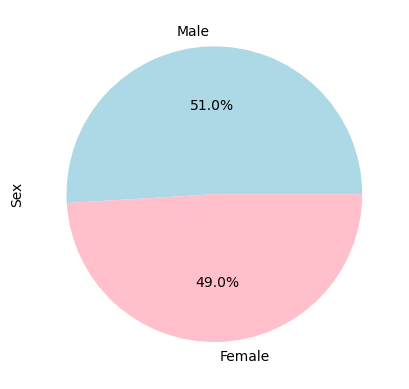

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution_pie = mouse_study_df_clean['Sex'].value_counts()
sex_distribution_pie.plot.pie(ylabel='Sex', autopct='%1.1f%%', colors=['lightblue','pink'])
plt.show()

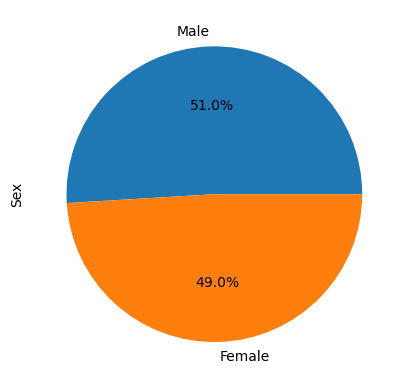

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution_pie = mouse_study_df_clean['Sex'].value_counts()
plt.pie(sex_distribution_pie, labels=sex_distribution_pie.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = mouse_study_df_clean[
                (mouse_study_df_clean['Drug Regimen'] == 'Capomulin') |
                (mouse_study_df_clean['Drug Regimen'] == 'Ramicane') |
                (mouse_study_df_clean['Drug Regimen'] == 'Infubinol') |
                (mouse_study_df_clean['Drug Regimen'] == 'Ceftamin')
]
filtered_df

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, mouse_study_df_clean, on=['Mouse ID','Timepoint'], how='left')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {drug: [] for drug in treatment_list}
outliers = {}

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    drug_data = merged_df[merged_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_data[drug].extend(drug_data)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drug_data.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq    

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers[drug] = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

print(outliers)

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64), 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64), 'Infubinol': 15    36.321346
Name: Tumor Volume (mm3), dtype: float64, 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}


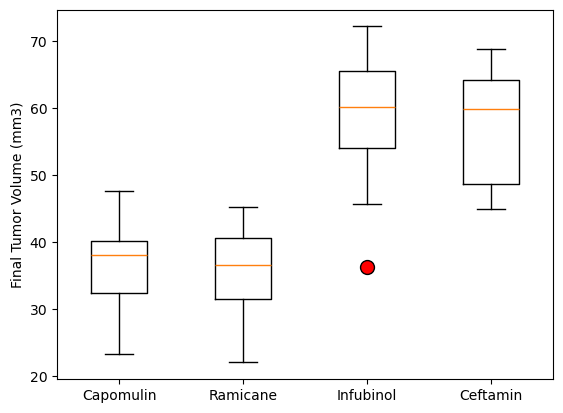

In [17]:
# Extract values and keys from dict
data_to_plot = list(tumor_vol_data.values())
labels = list(tumor_vol_data.keys())

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(data_to_plot, labels=labels, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10, 'markeredgecolor': 'black', 'alpha': 1.0})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

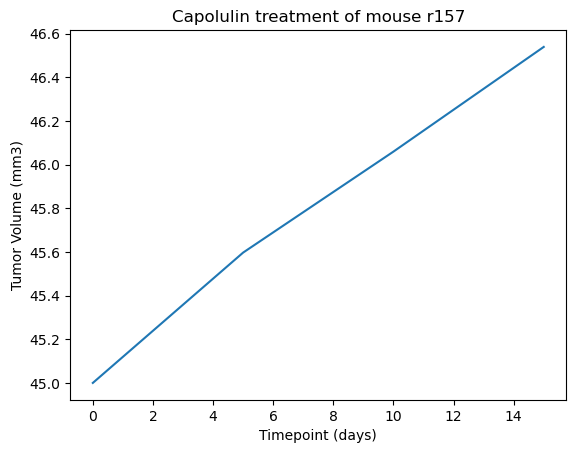

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# single_mouse_data = mouse_study_df_clean[(mouse_study_df_clean['Mouse ID'] == 'l509') & 
#                                          (mouse_study_df_clean['Drug Regimen'] == 'Capomulin')]

import random

# Filter data for mice treated with Capomulin
capomulin_data = mouse_study_df_clean[mouse_study_df_clean['Drug Regimen'] == 'Capomulin']

# Get a list of unique mouse IDs treated with Capomulin
capomulin_mice_ids = capomulin_data['Mouse ID'].unique()

# Randomly select one mouse ID from the list
random_mouse_id = random.choice(capomulin_mice_ids)

# Filter the data for the randomly selected mouse
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == random_mouse_id]

plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capolulin treatment of mouse {random_mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

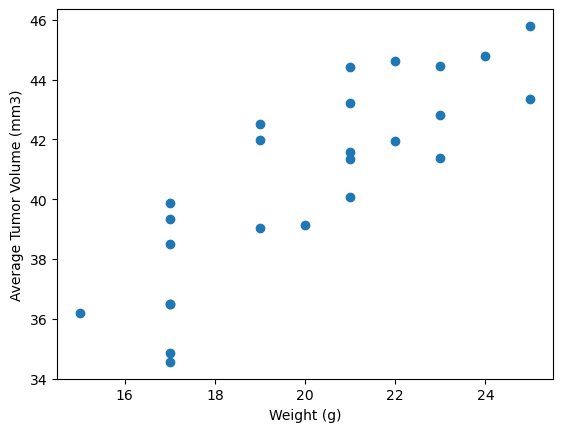

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_df_clean[mouse_study_df_clean['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


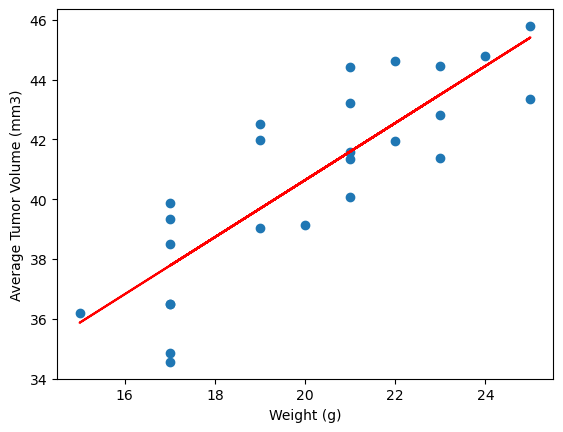

In [20]:
# Calculate the Pearson correlation coefficient
correlation, pvalue = st.pearsonr(weight, average_tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume is: {correlation:.2f}')

# Perform linear regression
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)

# Generate values for the regression line
regression_values = weight * slope + intercept

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot the regression line
plt.plot(weight, regression_values, color="red")
plt.show()